In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets



In [3]:
# dunno what this does
%matplotlib inline

# must load all datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

np.random.seed(111)

In [16]:
X, Y = noisy_circles
X , Y = X.T, Y.reshape(1, Y.shape[0])
Y.shape

(1, 200)

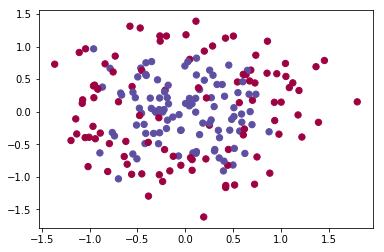

In [19]:
plt.scatter(X[0,:], X[1,:], c = Y[0], s=40, cmap = plt.cm.Spectral)

In [22]:
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1] # training set size
m

200

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 50 % (percentage of correctly labelled datapoints)


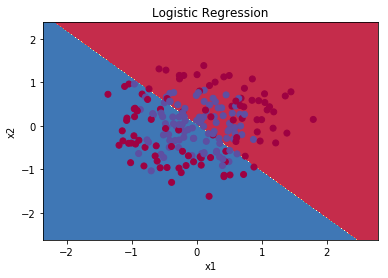

In [26]:
# check accuracy first with logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0])
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [76]:
def layer_sizes(X, Y):
    sizeInpLayer = X.shape[0]
    sizeHiddenLayer = 4
    sizeOutLayer = Y.shape[0]
    
    return(sizeInpLayer,sizeHiddenLayer, sizeOutLayer)

In [77]:
X_assess, Y_assess = layer_sizes_test_case()
(sizeInpLayer, sizeHiddenLayer, sizeOutLayer) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [81]:
def initialize_parameters(sizeInpLayer, sizeHiddenLayer, sizeOutLayer):
    np.random.seed(222)
    
    W1 = np.random.randn(sizeHiddenLayer, sizeInpLayer) * 0.01
    b1 = np.zeros((sizeHiddenLayer,1))
    W2 = np.random.randn(sizeOutLayer, sizeHiddenLayer) * 0.01
    b2 = np.zeros((sizeOutLayer, 1))
    
    assert (W1.shape == (sizeHiddenLayer, sizeInpLayer))
    assert (b1.shape == (sizeHiddenLayer, 1))
    assert (W2.shape == (sizeOutLayer, sizeHiddenLayer))
    assert (b2.shape == (sizeOutLayer, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
    

In [82]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01963425  0.0027577 ]
 [ 0.00458658  0.01001265]
 [-0.00763835  0.00721928]
 [-0.0090547   0.01001873]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.00520742  0.00308953  0.00113189 -0.00162334]]
b2 = [[0.]]


In [83]:
def forward_propagation(X, parameters):
    # get values from initialize_paramters output
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # do moltiplications
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [85]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # size of the test set
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(1-Y, np.log(1-A2))
    cost = - np.sum(logprobs)/m
    
    cost = np.squeeze(cost)     # turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [86]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


In [100]:
def backward_propagation(parameters, cache, X, Y):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # differentiate
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)/m
    dZ1 = np.dot(W2.T, dZ2) * (1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis = 1, keepdims = True)/m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads
    

In [101]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 4.51534562e-05 -1.12089989e-04]
 [ 3.86951737e-05 -9.61932694e-05]
 [-2.35337856e-05  5.83950305e-05]
 [-9.78055031e-05  2.42736441e-04]]
db1 = [[ 2.64302000e-05]
 [ 2.26492201e-05]
 [-1.37604508e-05]
 [-5.72132681e-05]]
dW2 = [[ 1.18260905e-05  2.64814362e-04 -1.26248674e-05 -1.53379055e-04]]
db2 = [[-0.00249836]]


In [98]:
def update_parameters(paramaters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [102]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

UnboundLocalError: local variable 'parameters' referenced before assignment

In [96]:
def nn_model(X,Y, sizeHiddenLayer, num_iterations = 10000, print_cost = False):
    np.random.seed(333)
    sizeInpLayer = layer_sizes(X,Y)[0]
    sizeOutLayer = layer_sizes(X,Y)[2]
    
    parameters = initialize_parameters(sizeInpLayer, sizeHiddenLayer, sizeOutLayer)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads, learning_rate = 1.2 )
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters
    

In [97]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

UnboundLocalError: local variable 'parameters' referenced before assignment

In [68]:
nn_model(X,Y, num_iterations = 10000, print_cost = True)

AssertionError: 